Tutorial 6: Bayesian inference and single-particle tracking

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
#%matplotlib inline

#read time series t, x(t),y(t) generated with a drift D 
data=np.loadtxt('Data/dataM1000d2.5.dat')

#read the number of data point from the data
M=np.size(data[:,1])



<AxesSubplot:xlabel='t'>

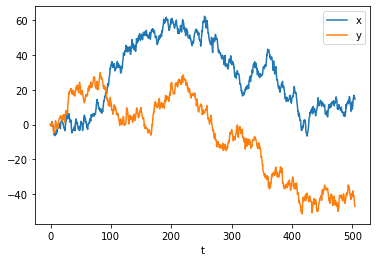

In [9]:
import pandas as pd
df= pd.DataFrame(data=data, columns=["t", "x", "y"])
df.plot(x="t",y=["x", "y"])

In [22]:
df

,t,x,y
0,0.000000,0.000000,0.000000
1,0.508787,-0.549764,0.049103
2,1.039278,-0.766939,-0.970484
3,1.898995,1.537412,1.521971
4,2.576719,1.670654,-0.368088
...,...,...,...
995,501.835721,15.420023,-41.084426
996,502.314581,16.385964,-40.823503
997,502.622701,16.794020,-42.100220
998,503.367141,16.034691,-45.079340


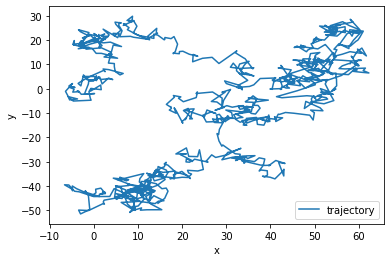

In [12]:
plt.plot(df["x"], df["y"], label="trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [17]:
def step_likelihood(dt, dr_sq, D):
    return (1/np.sqrt(4*np.pi*D*dt))*np.exp(-dr_sq/(4*D*dt))


dt=np.diff(df["t"])
dx=np.diff(df["x"])
dy=np.diff(df["y"])
dr_sq=dx**2+dy**2


B=np.sum(dr_sq/(4*dt))

In [34]:
import math 
def stirling(n):
    return math.sqrt(2*math.pi*n)*(n/math.e)**n

def post(D, B, M):
    np.exp(-B/D)*B**(M-2)/stirling(M-3)/D**(M-1)

D=np.linspace(0.1, 100, 1000)
plt.plot(D, post(D, B, np.shape(df["x"])[0]))

/var/folders/9j/p9y20_s14f7btwz8mkygmg7r0000gn/T/ipykernel_8845/1543158895.py:6: RuntimeWarning: overflow encountered in double_scalars
  np.exp(-B/D)*B**(M-2)/stirling(M-3)/D**(M-1)
/var/folders/9j/p9y20_s14f7btwz8mkygmg7r0000gn/T/ipykernel_8845/1543158895.py:6: RuntimeWarning: invalid value encountered in multiply
  np.exp(-B/D)*B**(M-2)/stirling(M-3)/D**(M-1)


OverflowError: (34, 'Result too large')